In [6]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

In [7]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 2. Load and Preprocess Dataset
# Load the dataset (update path to your local or Colab dataset)
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Rename columns for clarity
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Map sentiment labels (0=negative, 4=positive) to binary (0=negative, 1=positive)
data['target'] = data['target'].replace(4, 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Display first few rows
print("Dataset Head:")
print(data.head())

Dataset Head:
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [9]:
# 3. Text Preprocessing
def clean_tweet(tweet):
    """Clean tweet text by removing URLs, mentions, hashtags, punctuation, and stopwords."""
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)     # Remove hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    tweet = tweet.lower()                  # Convert to lowercase
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])  # Remove stopwords
    return tweet

# Apply cleaning to tweet text
data['clean_text'] = data['text'].apply(clean_tweet)

# Tokenize and pad sequences
max_words = 10000  # Vocabulary size
max_len = 50       # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['clean_text'])
sequences = tokenizer.texts_to_sequences(data['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Prepare features and labels
X = padded_sequences
y = data['target'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 4. Build and Train LSTM Model
# Define LSTM model
model_lstm = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Compile model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
print("\nTraining LSTM Model...")
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f'LSTM Test Accuracy: {lstm_accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training LSTM Model...
Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7600 - loss: 0.4891 - val_accuracy: 0.7884 - val_loss: 0.4478
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.7949 - loss: 0.4364 - val_accuracy: 0.7933 - val_loss: 0.4412
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8026 - loss: 0.4220 - val_accuracy: 0.7943 - val_loss: 0.4383
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8097 - loss: 0.4097 - val_accuracy: 0.7946 - val_loss: 0.4399
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8152 - loss: 0.3994 - val_accuracy: 0.7930 - val_loss: 0.4437
LSTM Test Accuracy: 0.7930


In [11]:
# 5. Build and Train GRU Model
# Define GRU model
model_gru = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    GRU(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Compile model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
print("\nTraining GRU Model...")
history_gru = model_gru.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
gru_loss, gru_accuracy = model_gru.evaluate(X_test, y_test, verbose=0)
print(f'GRU Test Accuracy: {gru_accuracy:.4f}')


Training GRU Model...
Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.7623 - loss: 0.4874 - val_accuracy: 0.7887 - val_loss: 0.4481
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.7945 - loss: 0.4370 - val_accuracy: 0.7941 - val_loss: 0.4397
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8044 - loss: 0.4202 - val_accuracy: 0.7950 - val_loss: 0.4377
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8119 - loss: 0.4073 - val_accuracy: 0.7938 - val_loss: 0.4400
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8194 - loss: 0.3931 - val_accuracy: 0.7921 - val_loss: 0.4442
GRU Test Accuracy: 0.7921


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step


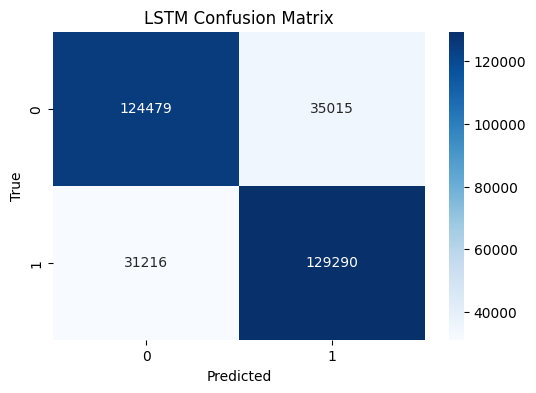


LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



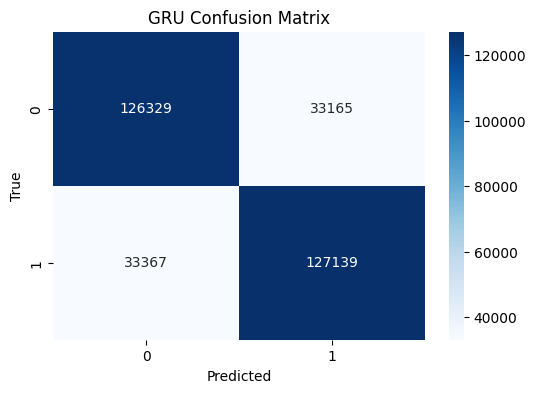


GRU Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79    159494
           1       0.79      0.79      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [12]:
# 6. Evaluate Models
# Predict on test set
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype(int)
y_pred_gru = (model_gru.predict(X_test) > 0.5).astype(int)

# Plot confusion matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report for LSTM
print('\nLSTM Classification Report:')
print(classification_report(y_test, y_pred_lstm))

# Plot confusion matrix for GRU
cm_gru = confusion_matrix(y_test, y_pred_gru)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues')
plt.title('GRU Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report for GRU
print('\nGRU Classification Report:')
print(classification_report(y_test, y_pred_gru))

In [13]:
# 7. Predict Sentiment on New Tweets
def predict_sentiment(tweet, model, tokenizer, max_len):
    """Predict sentiment for a new tweet."""
    cleaned_tweet = clean_tweet(tweet)
    sequence = tokenizer.texts_to_sequences([cleaned_tweet])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)[0][0]
    return 'Positive' if prediction > 0.5 else 'Negative'

# Example prediction
new_tweet = "I love this product, it is amazing!"
lstm_pred = predict_sentiment(new_tweet, model_lstm, tokenizer, max_len)
gru_pred = predict_sentiment(new_tweet, model_gru, tokenizer, max_len)

print(f'\nTweet: {new_tweet}')
print(f'LSTM Prediction: {lstm_pred}')
print(f'GRU Prediction: {gru_pred}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Tweet: I love this product, it is amazing!
LSTM Prediction: Positive
GRU Prediction: Positive


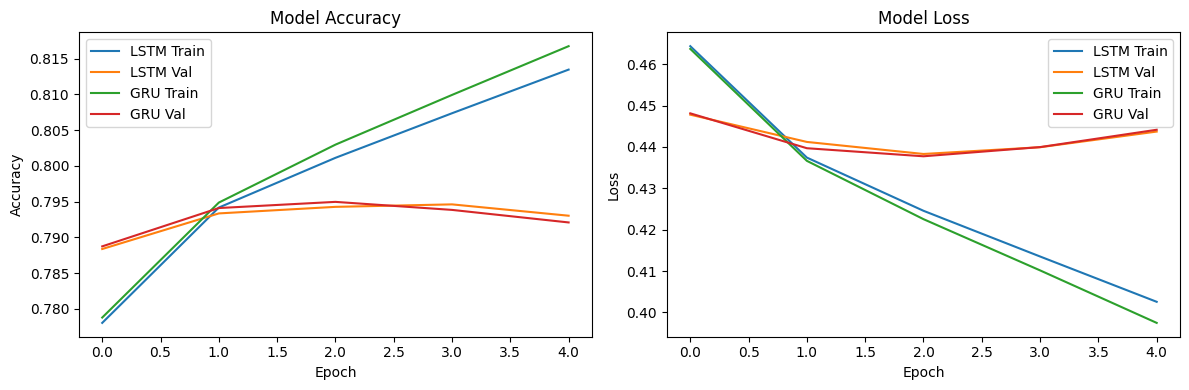

In [14]:
# 8. Visualize Training Performance
# Plot training accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='LSTM Train')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val')
plt.plot(history_gru.history['accuracy'], label='GRU Train')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='LSTM Train')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val')
plt.plot(history_gru.history['loss'], label='GRU Train')
plt.plot(history_gru.history['val_loss'], label='GRU Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()